<a href="https://colab.research.google.com/github/Louiseri1/MNIST/blob/main/Computer_Vision_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La base MNIST (Modified National Institute of Standards and Technology) est une base de données de chiffres écrits à la main développée pour le problème de reconnaissance de chiffres manuscrits par trois chercheurs très réputés dans ce domaine: Yann LeCun, Corinna Cortes et Christopher Burges.

Elle regroupe 60 000 images, issues d'une base de données antérieure, appelée NIST. Ces images sont en échelle de gris, normalisées centrées et de taille 28x28 pixels. Les images sont données ici sous forme de vecteurs unidimensionnels de taille 784 (= 28 x 28 x 1). Nous sommes ici sur un seul canal représentant les échelles de gris.

In [58]:
import itertools
import matplotlib.pyplot as plt
from keras.datasets import mnist

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# DL
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


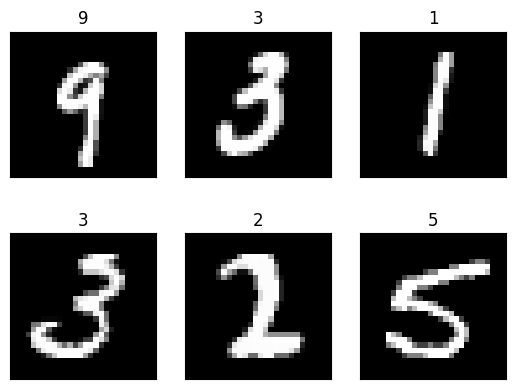

In [4]:
# 6 images tirées aléatoirement dans le jeu de données et labélisées
for i in range(1,7) :
    j = np.random.choice(range(len(y_train)))
    plt.subplot(2,3,i)
    plt.imshow(X_train[j], cmap = 'gray')
    plt.title(f'{y_train[j]}')
    plt.xticks([])
    plt.yticks([]);

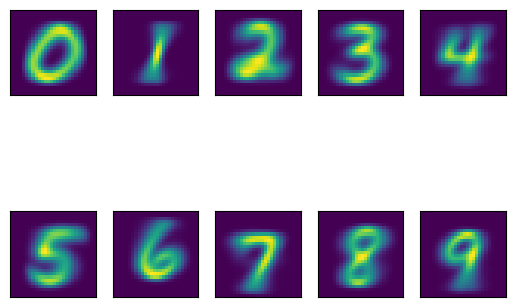

In [8]:
# Affichage de l'image 'moyenne' pour chacun des chiffres de 1 à 9
for chiffre in range(10):
    t = X_train[y_train == chiffre]
    moyenne = t.mean(axis = 0)
    plt.subplot(2,5,chiffre+1)
    plt.imshow(moyenne)
    plt.xticks([])
    plt.yticks([]);

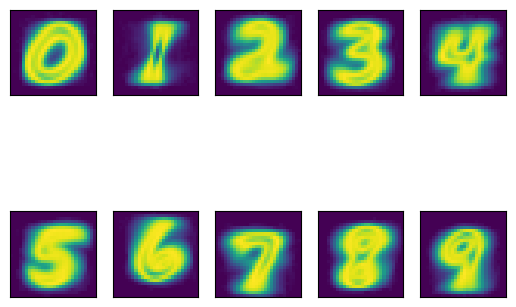

In [12]:
# Affichage de la variation de l'image ("écart type") pour chacun des chiffres de 1 à 9

for i in range(10) :
    t = X_train[y_train == i]
    variation = t.std(axis=0)
    plt.subplot(2, 5, i+1)
    plt.imshow(variation)
    plt.xticks([])
    plt.yticks([]);

Random Forest pour la détection d'images

In [42]:
# Transformation de chaque X_train et X_test (initialement des vecteurs (28,28,1) en (1, 784))
# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

# Modèle
rfc = RandomForestClassifier(n_jobs = -1) # on utilise tous les kernels pour les calculs
rfc.fit(X_train, y_train)

Shape of X: (60000, 784)
Shape of y: (60000,)


RandomForestClassifier(n_jobs=-1)

In [18]:
# Prédictions
test_pred = rfc.predict(X_test)

# Métriques d'évaluations
print(accuracy_score(y_test, test_pred)*100, "%")
print(classification_report(y_test, test_pred))
display(confusion_matrix(y_test, test_pred))

# Le f1 score qui fait la synthèse du recall et de la précision est très elevé pour chaque chiffres, ce qui signifie que les classes sont bien gérées par le modèle.

96.97 %
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



array([[ 972,    0,    1,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1123,    3,    3,    0,    2,    2,    0,    1,    1],
       [   6,    0, 1001,    7,    2,    0,    3,    8,    5,    0],
       [   0,    0,    9,  972,    0,    7,    0,    9,    9,    4],
       [   1,    0,    1,    0,  956,    0,    5,    0,    3,   16],
       [   3,    1,    0,   10,    3,  860,    6,    2,    5,    2],
       [   6,    3,    0,    0,    3,    4,  939,    0,    3,    0],
       [   1,    4,   22,    3,    1,    0,    0,  984,    4,    9],
       [   3,    0,    5,    6,    3,    7,    5,    4,  932,    9],
       [   6,    4,    1,   11,   15,    2,    1,    5,    6,  958]])

In [23]:
# Observations des erreurs récurrentes faites par le modèle
resultat = []
cnf = confusion_matrix(y_test, test_pred)
for i,j in itertools.product(range(cnf.shape[0]), range(cnf.shape[1])) : # itertools permet de parcourir les indices de la matrice
    if i != j and cnf[i,j] >= 15:                                        # On se place ailleurs que sur la diagonale où les predictions sont bonnes et là où les erreurs sont nombreuses (> 15)
        print(f"Le chiffre {i} est souvent confondu avec le chiffre {j}")

Le chiffre 4 est souvent confondu avec le chiffre 9
Le chiffre 7 est souvent confondu avec le chiffre 2
Le chiffre 9 est souvent confondu avec le chiffre 4


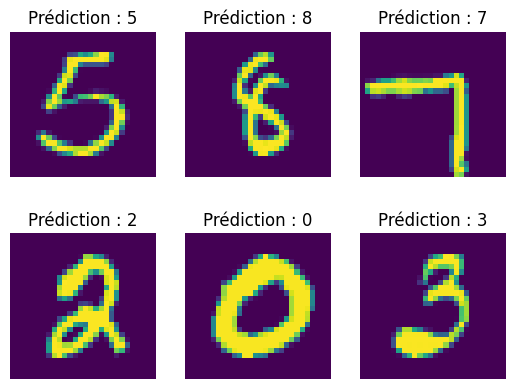

In [25]:
# Affichage de 6 images aléatoirement choisies dans le test set et leurs prédictions
for i in range(6) :
    plt.subplot(2,3,i+1)
    aleatoire = np.random.choice(range(len(y_test)))
    img = X_test[aleatoire]
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.title(f"Prédiction : {test_pred[aleatoire]}")
    plt.axis('off');

Dense Neural Network

In [43]:
# Pour des questions de performances, nous réduisons l'intensité pixels pour qu'ils soient compris entre 0 et 1
X_train = X_train / 255
X_test = X_test / 255

# On transforme également y_train et y_test pour qu'ils soient des vecteurs catégoriels binaires (codés 0 ou 1 pour chaque catégories / one hot)
# Cela est nécessaire pour l'utilisation d'une fonction de perte de classification multiclasses (categorical crossentropy)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
# Construction du modèle
model = Sequential()
model.add(Dense(20, input_shape = (784,), activation = 'tanh', kernel_initializer = 'normal')) # vecteur de poids est initialisés aléatoirement suivant la loi normale
                                                                                            # input_shape correspond à 28 * 28, le nombre de pixel par image
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal')) # 10 neurones pour la sorties car on a 10 classes et softmax car c'est la fonction d'activation appropriée à une classification multiclasses
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6316 - loss: 1.6690 - val_accuracy: 0.8884 - val_loss: 0.5847
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8840 - loss: 0.5308 - val_accuracy: 0.9086 - val_loss: 0.3666
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9085 - loss: 0.3604 - val_accuracy: 0.9177 - val_loss: 0.3067
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9173 - loss: 0.3083 - val_accuracy: 0.9259 - val_loss: 0.2758
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9246 - loss: 0.2688 - val_accuracy: 0.9279 - val_loss: 0.2579
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9304 - loss: 0.2497 - val_accuracy: 0.9312 - val_loss: 0.2458
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9318 - loss: 0.2385 - val_accuracy: 0.9357 - val_loss: 0.2346
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9376 - loss: 0.2203 - val_accuracy: 0.

[0.18865855038166046, 0.9435999989509583]

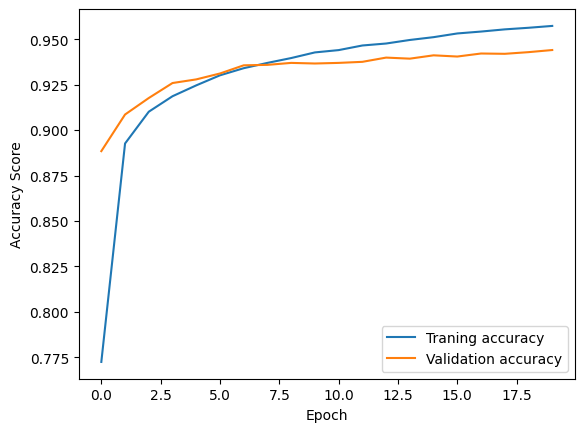

In [45]:
# Compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs = 20, batch_size = 200, validation_split = 0.2) # chaque epochs parcourera 60000/200 batchs

# Stocker les accuracies d'entraînement et de test obtenues à chaque epochs
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualisation de l'évolution au cours des epochs de nos scores d'accuracy
plt.plot(train_acc, label = 'Traning accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score');

model.evaluate(X_test, y_test)

In [57]:
# Prédictions du modèle
y_pred_proba = model.predict(X_test) # le modèle renvoit la probabilité d'appartenir à chaque classe
y_pred = np.argmax(y_pred_proba, axis = 1) # classes prédites
y_test = np.argmax(y_test, axis = 1) # classes réelles (on revient sans le one hot encoder)

# Métriques d'évaluation
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.94      0.92      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.93      0.91      0.92       892
           6       0.95      0.97      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.92      0.92      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



array([[ 962,    0,    3,    1,    1,    2,    6,    2,    3,    0],
       [   0, 1121,    3,    2,    1,    1,    3,    2,    2,    0],
       [   8,    3,  963,    8,   11,    3,    8,    5,   21,    2],
       [   2,    2,   25,  926,    1,   23,    1,   10,   16,    4],
       [   1,    0,    6,    2,  933,    0,    9,    2,    3,   26],
       [  10,    2,    2,   16,    4,  813,   13,    1,   26,    5],
       [   9,    3,    3,    2,    5,    8,  925,    0,    3,    0],
       [   2,    6,   19,    4,    5,    0,    0,  964,    3,   25],
       [   4,    3,   10,   15,    6,   14,    9,    9,  898,    6],
       [   5,    6,    3,   11,   24,    7,    0,   16,    6,  931]])

Architecture LeNet - Réseau de neurones convolutifs
Cette architecture comprend des couches de convolutions, bien plus adaptées à l'extraction de caractéristiques (contrastes, bordures...) sur des images et donc particulièrement performantes en computer vision.

In [60]:
X_train_conv = X_train.reshape((-1, 28, 28, 1))
X_test_conv = X_test.reshape((-1, 28, 28, 1))

model_conv = Sequential()
model_conv.add(Conv2D(filters=30, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Dropout(rate=0.2))
model_conv.add(Flatten())
model_conv.add(Dense(units = 128, activation ='relu'))
model_conv.add(Dense(units = 10, activation ='softmax'))

model_conv.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

training_history_conv = model_conv.fit(X_train_conv, y_train, epochs = 10, batch_size = 20, validation_split = 0.2)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8764 - loss: 0.3853 - val_accuracy: 0.9837 - val_loss: 0.0566
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9795 - loss: 0.0666 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9836 - loss: 0.0502 - val_accuracy: 0.9889 - val_loss: 0.0399
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9863 - loss: 0.0408 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - accuracy: 0.9893 - loss: 0.0322 - val_accuracy: 0.9902 - val_loss: 0.0346
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9910 - val_loss: 0.0338
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 85s 19ms/step - accuracy: 0.9925 - loss: 0.0221 - val_accuracy: 0.9883 - val_loss: 0.0428
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 93s 23ms/step - accuracy: 0.9931 -

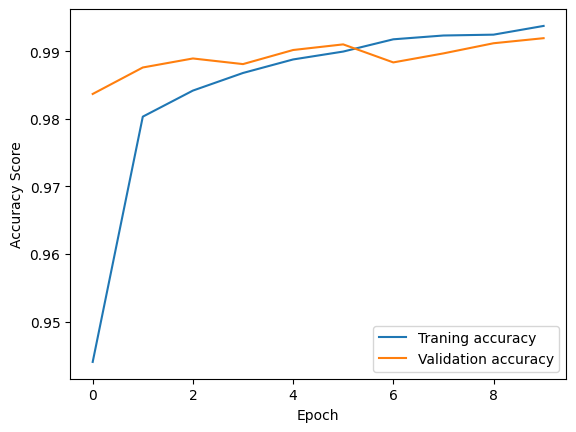

In [62]:
# Stocker les accuracies d'entraînement et de test obtenues à chaque epochs
train_acc = training_history_conv.history['accuracy']
val_acc = training_history_conv.history['val_accuracy']

# Visualisation de l'évolution au cours des epochs de nos scores d'accuracy
plt.plot(train_acc, label = 'Traning accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score');

In [66]:
# Prédictions du modèle
y_pred_proba = model_conv.predict(X_test_conv) # le modèle renvoit la probabilité d'appartenir à chaque classe
y_pred = np.argmax(y_pred_proba, axis = 1) # classes prédites

# Métriques d'évaluation
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1130,    2,    1,    0,    0,    1,    1,    0,    0],
       [   0,    0, 1025,    1,    0,    0,    0,    4,    2,    0],
       [   0,    0,    0, 1006,    0,    3,    0,    0,    1,    0],
       [   0,    2,    0,    0,  964,    0,    2,    0,    0,   14],
       [   0,    0,    0,    5,    0,  885,    1,    1,    0,    0],
       [   1,    3,    0,    0,    0,    7,  945,    0,    1,    1],
       [   0,    2,    3,    0,    0,    0,    0, 1020,    1,    2],
       [   2,    1,    1,    0,    0,    2,    0,    0,  966,    2],
       [   0,    0,    0,    0,    3,    6,    0,    2,    0,  998]])

In [67]:
# Les résultats obtenus avec l'architecture LeNet sont excellents.

Synthèse

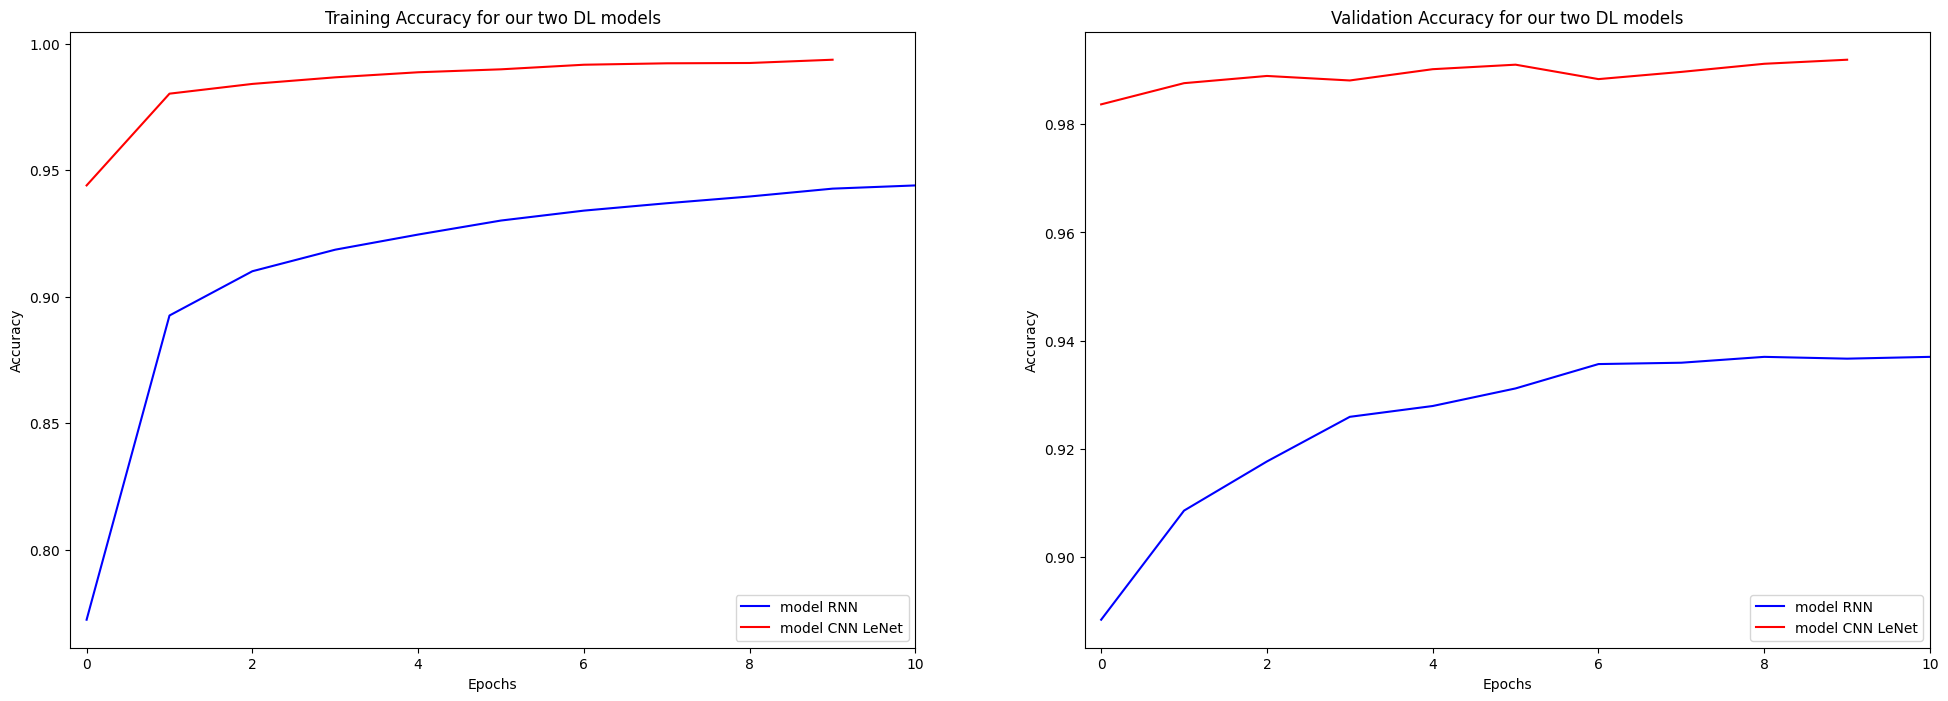

In [74]:
# Synthèse des résultats des modèles de Deep Learning - Visualisation des accuracies sur les 10 premières epochs

plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training Accuracy for our two DL models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'model RNN', color='blue')
plt.plot(training_history_conv.history['accuracy'], label = 'model CNN LeNet', color='red')
plt.xlim(-0.2,10)
plt.legend()

plt.subplot(122)
plt.title('Validation Accuracy for our two DL models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'], label = 'model RNN', color='blue')
plt.plot(training_history_conv.history['val_accuracy'], label = 'model CNN LeNet', color='red')

plt.xlim(-0.2,10)
plt.legend();